## 8.1 The Nonparametric Bootstrap

_Compute the nonparametric bootstrap distribution of the Pearson’s correlation coefficient between LSAT
and GPA using B = 40000 bootstrap samples._

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

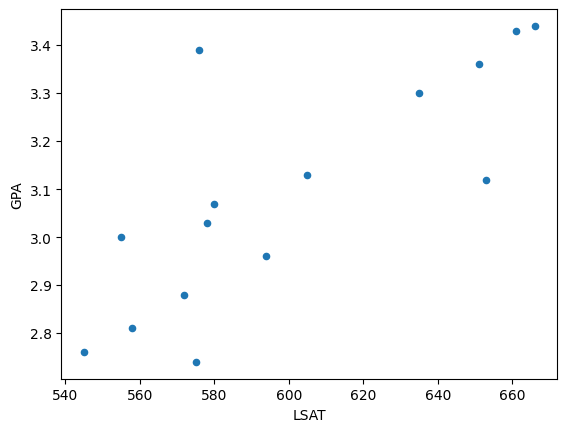

In [2]:
df = pd.read_csv("law.csv")
df.plot.scatter(x="LSAT", y="GPA")
plt.show()

In [3]:
np.corrcoef(df["LSAT"], df["GPA"])

array([[1.        , 0.77637449],
       [0.77637449, 1.        ]])

In [4]:
def bootstrap(data):
    return [random.choice(data) for _ in range(len(data))]

np.array(bootstrap(df.values)).shape, np.stack(bootstrap(df.values), axis=1).shape

((15, 2), (2, 15))

In [5]:
def bootstrap_df(df):
    return pd.DataFrame(bootstrap(df.values), columns=df.columns)

bootstrap_df(df)

,LSAT,GPA
0,653.0,3.12
1,575.0,2.74
2,558.0,2.81
3,555.0,3.00
4,605.0,3.13
5,594.0,2.96
6,594.0,2.96
7,651.0,3.36
8,666.0,3.44
9,580.0,3.07


In [6]:
np.corrcoef(bootstrap_df(df).values.T)

array([[1.        , 0.91664211],
       [0.91664211, 1.        ]])

In [7]:
distribution = [np.corrcoef(bootstrap_df(df).values.T)[0][1] for _ in range(40_000)]

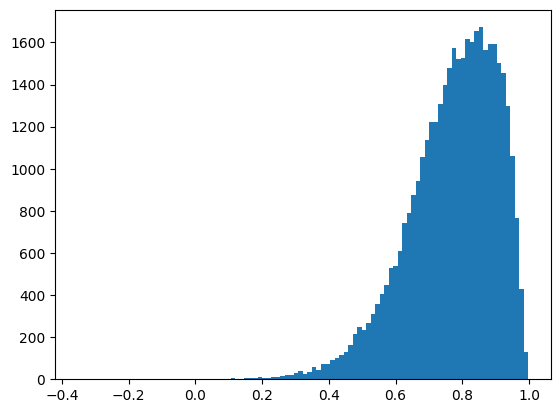

In [8]:
plt.hist(distribution, bins=100)
plt.show()